<a href="https://colab.research.google.com/github/JayMayse/ConsoleApp2/blob/master/review%20of%20June%2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv('/content/AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [13]:
df=df.sort_values(by=['Datetime'])

In [14]:
len(df )

121273

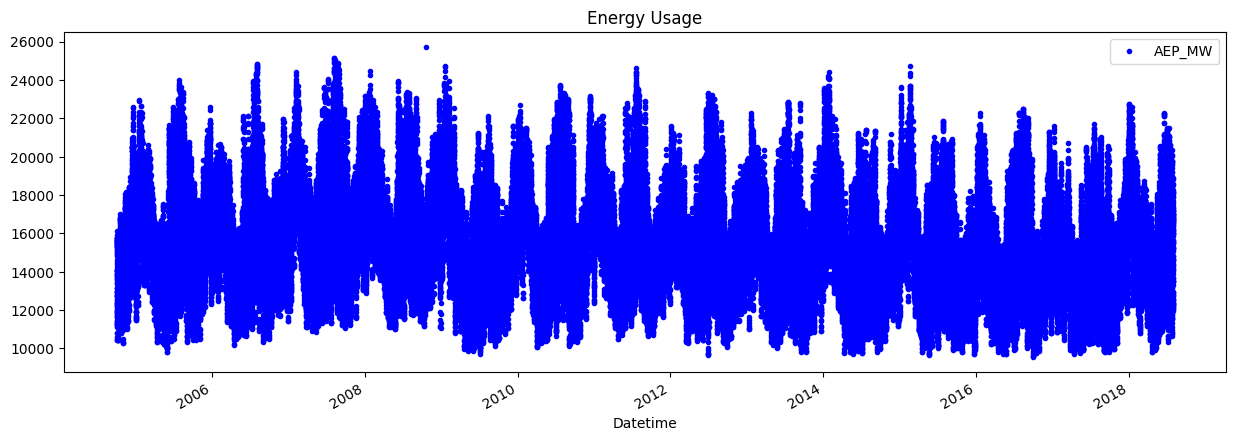

In [15]:
df.plot(style='.',
        figsize=(15,5),
        color='blue',
        title = 'Energy Usage')
plt.show()

In [16]:
#  train = df.loc[df.index <'2014-01-01']
#  test = df.loc[df.index >= '2014-01-01']

#  fig.ax = plt.subplots(figsize = (15,5))
#  train.plot(ax=ax, label = 'Trainnig Set', title = 'Data Train/Test Split')
#  test.plot(ax=ax, lable = 'Test Set')

#this didnt plot for some reason.  ask in class

In [17]:
train = df.loc[df.index <'2021-01-01']
test = df.loc[df.index >= '2021-01-01']

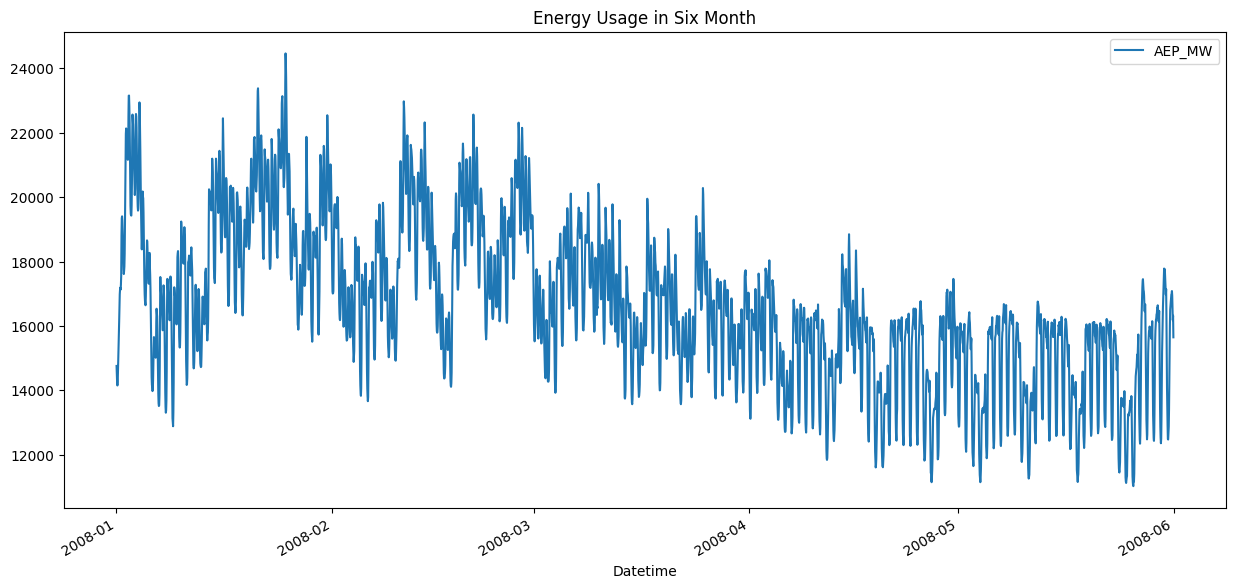

In [18]:
df.loc[(df.index > '01-01-2008') & (df.index < '06-01-2008')].plot(figsize=(15, 7), title = 'Energy Usage in Six Month')
plt.show()

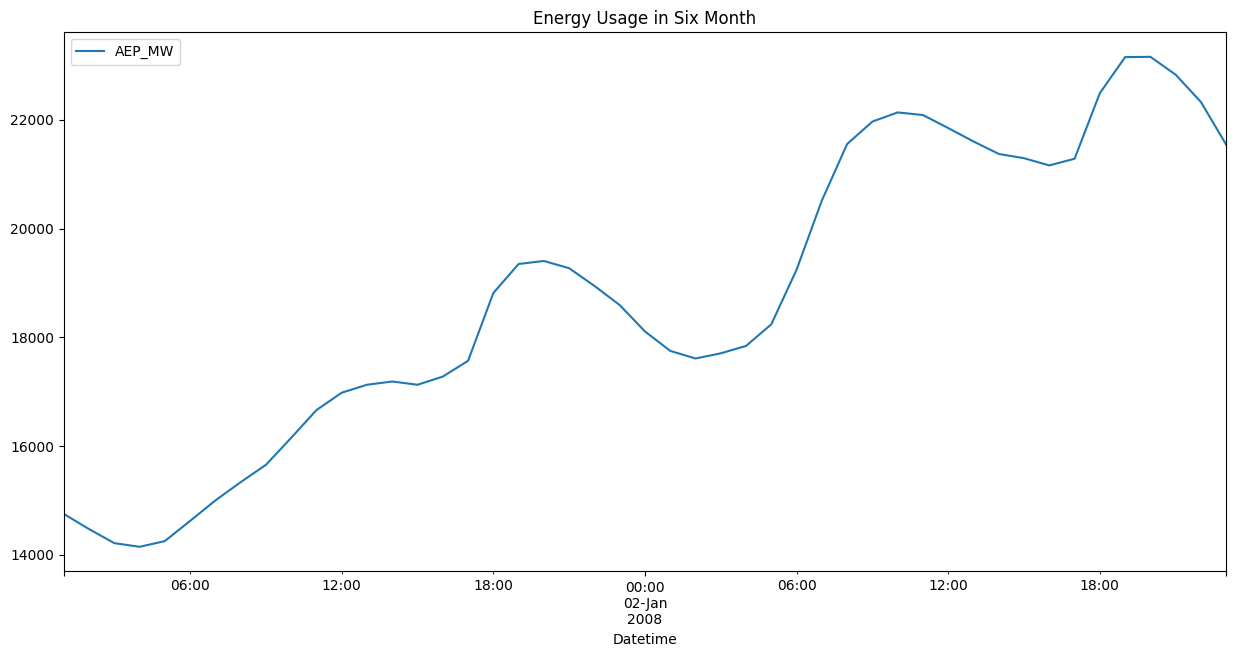

In [19]:
df.loc[(df.index > '01-01-2008') & (df.index < '01-03-2008')].sort_values(by='Datetime').plot(figsize=(15, 7), title = 'Energy Usage in Six Month')
plt.show()

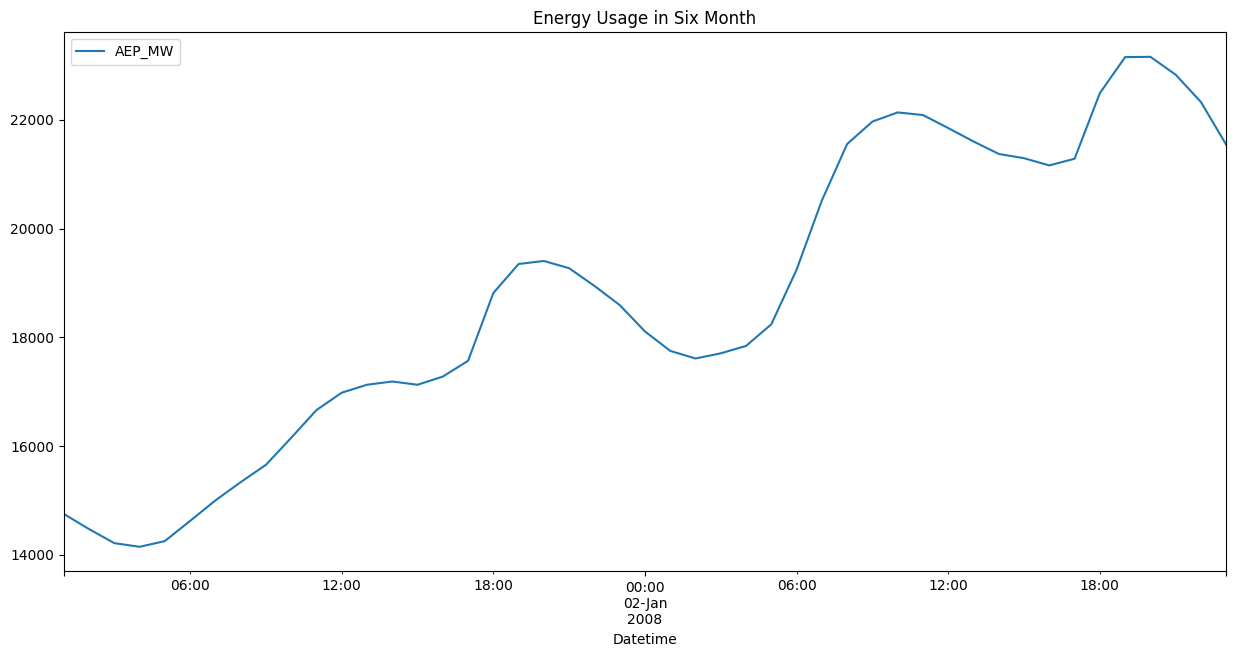

In [20]:
df.loc[(df.index > '01-01-2008') & (df.index < '01-03-2008')].plot(figsize=(15, 7), title = 'Energy Usage in Six Month')
plt.show()

#why is my line there?

<Axes: xlabel='Datetime'>

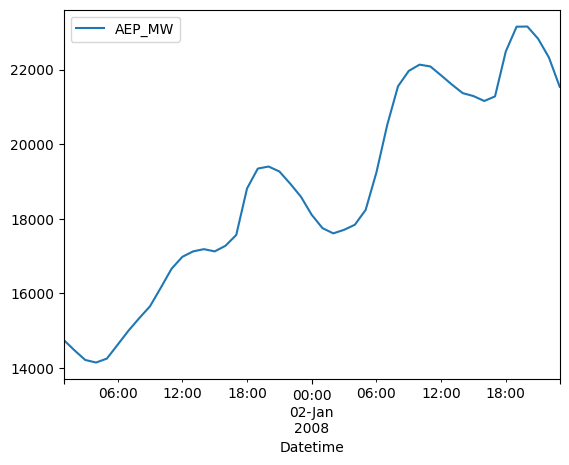

In [21]:
df.loc[(df.index > '01-01-2008') & (df.index < '01-03-2008')].sort_values(by='Datetime').plot()

In [22]:
df.loc[(df.index > '01-01-2008') & (df.index < '01-03-2008')]

,AEP_MW
Datetime,
2008-01-01 01:00:00,14755.0
2008-01-01 02:00:00,14475.0
2008-01-01 03:00:00,14217.0
2008-01-01 04:00:00,14149.0
2008-01-01 05:00:00,14254.0
2008-01-01 06:00:00,14625.0
2008-01-01 07:00:00,15001.0
2008-01-01 08:00:00,15337.0
2008-01-01 09:00:00,15656.0


In [23]:
def create_feature(df):
  df=df.copy()
  df['hour']=df.index.hour
  df['dayofweek']=df.index.dayofweek
  df['quarter']=df.index.quarter
  df['month']=df.index.month
  df['year']=df.index.year
  df['dayofyear']=df.index.dayofyear
  df['dayofmonth']=df.index.day
  df['dayofyear']=df.index.dayofyear
  return df

df = create_feature(df)

In [24]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,,
2004-10-01 01:00:00,12379.0,1,4,4,10,2004,275,1
2004-10-01 02:00:00,11935.0,2,4,4,10,2004,275,1
2004-10-01 03:00:00,11692.0,3,4,4,10,2004,275,1
2004-10-01 04:00:00,11597.0,4,4,4,10,2004,275,1
2004-10-01 05:00:00,11681.0,5,4,4,10,2004,275,1
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,3,3,8,2018,214,2
2018-08-02 21:00:00,17303.0,21,3,3,8,2018,214,2
2018-08-02 22:00:00,17001.0,22,3,3,8,2018,214,2


<Axes: xlabel='hour', ylabel='AEP_MW'>

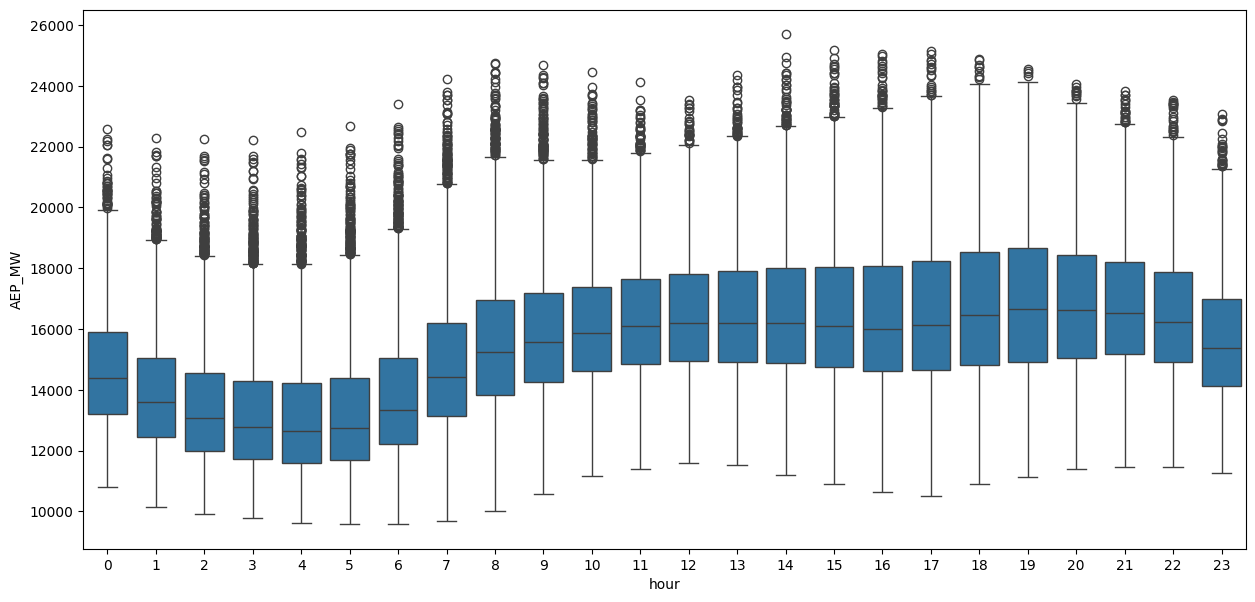

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data= df, x = 'hour', y = 'AEP_MW', ax=ax)

#<Axes: xlabel = 'hour', ylabel='AEP_MW'>

<Axes: xlabel='month', ylabel='AEP_MW'>

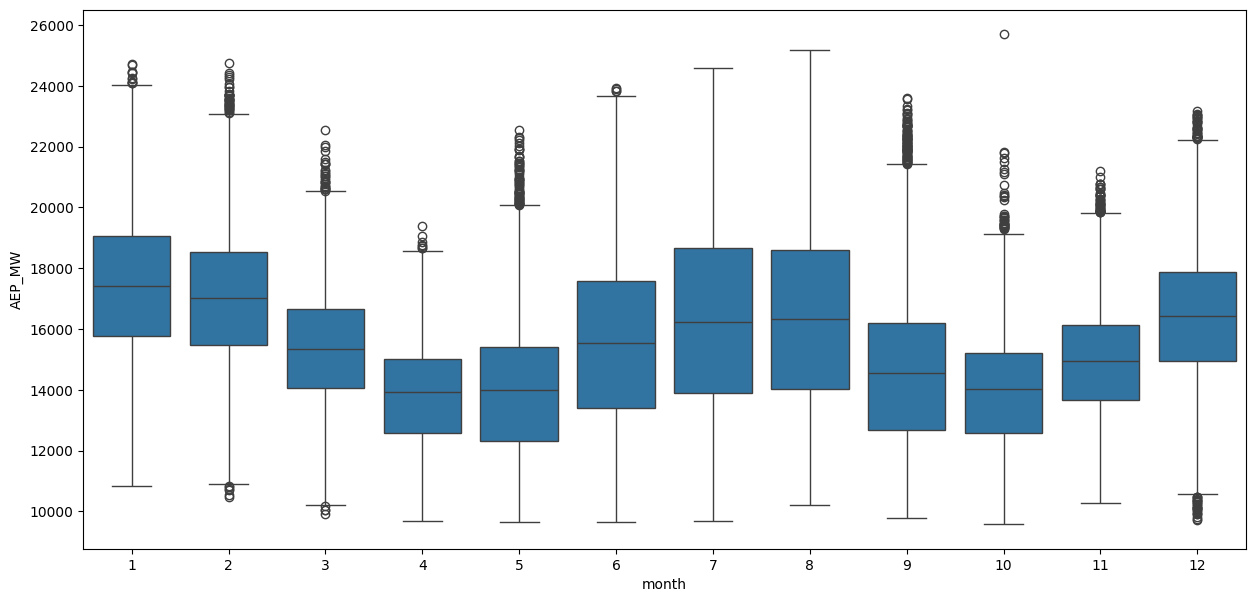

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data= df, x = 'month', y = 'AEP_MW', ax=ax)

<Axes: xlabel='year', ylabel='AEP_MW'>

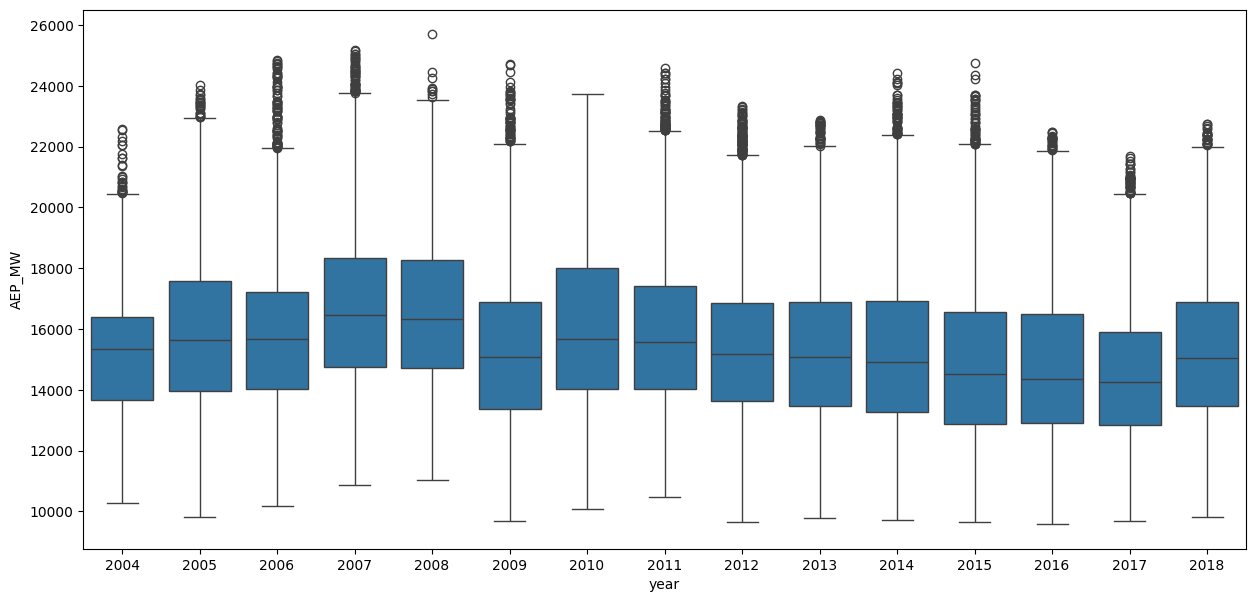

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data= df, x = 'year', y = 'AEP_MW', ax=ax)

In [30]:
train = create_feature(train)
test = create_feature(test)

X_train = train.drop('AEP_MW', axis=1)
y_train = train['AEP_MW']

X_test = test.drop('AEP_MW', axis=1)
y_test = train['AEP_MW']

In [33]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=55, eval_set = [(x_test, y_test)], verbose=True)
reg.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        verbose = True)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:04:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoostError: [04:04:13] /workspace/src/data/data.cc:773: Check failed: labels.Shape(0) == num_row_ (121273 vs. 0) : Size of labels must equal to number of rows.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7ff085a5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4d7fb6) [0x7ff085cd7fb6]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5e630d) [0x7ff085de630d]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5fc853) [0x7ff085dfc853]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x15e) [0x7ff08596887e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7ff0f1e85e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7ff0f1e82493]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7ff0f20e64d8]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0x9c8e) [0x7ff0f20e5c8e]

